In [120]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.cm as cmx
import matplotlib.colorbar as cb

from astropy import units as u
from astropy.constants import G
from astropy.io import ascii
from astropy.table import Table
import astropy.time
import dateutil.parser

from matplotlib import gridspec
import scipy.optimize as sciop
import json
from scipy.stats import mode

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

%matplotlib inline

In [35]:
# read in a TRAPPIST-1 light curve from Europa chosen at random
f = open("./Europa_20221120_I+z_2635476908753563008_Trappist-1b.json")
data = json.load(f)

print(type(data))
print(data.keys())
print(data['gaia_id'])
print(data['sp_id'])

<class 'dict'>
dict_keys(['telescope', 'date', 'filter', 'gaia_id', 'sp_id', 'last_mod_time', 'dir', 'environment', 'telescope_downtime', 'best_ap', 'best_ap_pwv', 'stars', 'ALC', 'FLAG'])
2635476908753563008
Trappist-1b


6
291


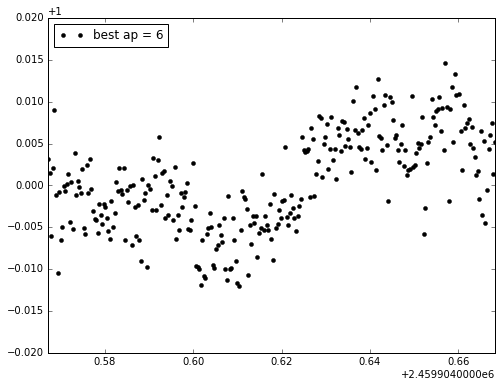

In [85]:


#for key, value in data.items():
#    print(key)
#    print(type(value))
#    print("\n")

"""
for key, value in data['environment'].items():
    print(key)
    print(type(value))
    print("\n")

for key, value in data['stars'].items():
    print(key)
    print(type(value))
    print("\n")

for key, value in data['ALC'].items():
    print(key)
    print(type(value))
    print("\n")
  
for key, value in data['FLAG'].items():
    print(key)
    print(type(value))
    print("\n")
"""

print(data['best_ap'])


bjd = data['environment']['BJD-OBS']
print(len(bjd))

#TRAPPIST-1b, or gaia-id 2635476908753563008, is in data['stars'][n][0]


fig, ax = plt.subplots(1,1,figsize=(8,6))
#for k in range(3,9):
    #ax.errorbar(bjd, data['stars'][str(k)][0]['DIFF_FLUX'], yerr = data['stars'][str(k)][0]['ERROR'],capsize=0,linestyle='None',label=str(k))
#    ax.plot(bjd, data['stars'][str(k)][0]['DIFF_FLUX'],marker='.',linestyle='None',label=str(k))

    
#ax.errorbar(bjd, data['stars'][data['best_ap']][0]['DIFF_FLUX'], yerr = data['stars'][data['best_ap']][0]['ERROR'],color='k', markersize=10,capsize=0,linestyle='None',label="best ap = {0}".format(data['best_ap']))
ax.plot(bjd, data['stars']['6'][0]['DIFF_FLUX'], marker='.',color='k', markersize=8,linestyle='None',label="best ap = {0}".format(data['best_ap']))


ax.set_xlim(bjd[0],bjd[-1])
ax.set_ylim(0.98,1.02)
plt.legend(loc="best")
plt.show()


In [98]:
bjd = np.array((bjd))
cad = bjd[1:] - bjd[0:-1]
#plt.hist(cad)

print(np.median(cad) * 24 * 60)
print(mode(cad)[0][0] * 24 * 60) # minutes

0.5024159699678421
0.5032803118228912


In [102]:
# make a histogram of observed hours per target (from https://www.mrao.cam.ac.uk/SPECULOOS/speculoos-portal/php/get_hours.php, accessed 9 March 2023)

hours = [" ------------------------- ,0"," 00022 ,11.936"," 03200 ,16.257"," 10199 ,13.494"," 2004-XR190 ,5.0824"," 2004-XR190-2 ,2.5549"," ASTEROID-TEST-2680822 ,0.9186"," ASTEROID-TEST?-100822 ,2.2185"," BD-16-52- ,9.214"," CH-HATS-69-B ,4.8336"," CH-SDSSJ000557.45+001833. ,4.2385"," CH-WD-0315-293 ,4.2385"," D6108 ,41.303"," EB-0350 ,6.1955"," EBLM-J0608-59 ,49.164"," EP249631677 ,8.097"," G196-3B ,14.998"," GAIJIN-1 ,3.0115"," GJ-299 ,5.5518"," GJ1132 ,16.17"," GJ1132B ,5.5569"," HD-14326- ,27.235"," HW-VIR ,20.792"," J0608 ,14.248"," J1509-10 ,9.9954"," KEPLER-460B ,9.315"," LP890-9.01 ,4.6166"," LP890-9.02 ,11.469"," LUHMAN-16 ,16.61"," NEMESIS-1.01 ,5.0464"," NEMESIS-11.01 ,2.5521"," NEMESIS-12 ,141.38"," NEMESIS-12.01 ,17.034"," NEMESIS-12.02 ,2.7142"," NEMESIS-13 ,17.132"," NEMESIS-2.01 ,7.7174"," NEMESIS-3 ,48.231"," NEMESIS-3.01 ,7.3224"," NEMESIS-6.01 ,4.7487"," NEMESIS-7.01 ,6.6182"," NEMESIS-8.01 ,2.5731"," NGTS-10 ,3.8597"," NGTS-10B ,4.6361"," NGTS-11 ,4.5963"," NGTS-BD ,17.101"," NGTS-X ,11.398"," NGTS-XBB ,5.5838"," NGTS0002-2953 ,9.6667"," NOI-105435 ,4.6551"," SP0002+0115 ,38.925"," SP0004-2058 ,163.7"," SP0004-4044 ,39.108"," SP0006-0732 ,104.71"," SP0008+4918 ,170.977"," SP0011+5908 ,195.536"," SP0024-0158 ,172.99"," SP0025+5422 ,73.208"," SP0026-5428 ,195.3"," SP0027-5401 ,154.46"," SP0036+1821 ,189.24"," SP0049-0635 ,16.529"," SP0051-2251 ,25.11"," SP0052-6201 ,8.1241"," SP0055-3052 ,6.8769"," SP0102-3737 ,211.75"," SP0102-6322 ,35.697"," SP0109+2949 ,80.936"," SP0109-0343 ,187.07"," SP0109-4954 ,32.804"," SP0109-5100 ,196.64"," SP0111-4908 ,227.29"," SP0123-4240 ,76.48"," SP0124-3355 ,22.751"," SP0138-7320 ,82.47"," SP0148-3024 ,211.5"," SP0158+1807 ,9.4408"," SP0202+1020 ,150.37"," SP0207-3721 ,182.4"," SP0212-1036 ,17.849"," SP0214-0357 ,28.944"," SP0215-3040 ,235.81"," SP0216+1335 ,130.06"," SP0216-2200 ,12.355"," SP0218-0617 ,4.6069"," SP0219+5919 ,21.549"," SP0222-2732 ,206.86"," SP0225+6229 ,186.457"," SP0227-6447 ,67.041"," SP0237-3434 ,61.592"," SP0248-1651 ,187.46"," SP0249-3131 ,28.107"," SP0253+1652 ,221.88"," SP0253-2336 ,110.26"," SP0253-7957 ,30.531"," SP0253-7959 ,56.185"," SP0254-1934 ,176.6"," SP0255-4700 ,197.66"," SP0302-3950 ,187.69"," SP0306-2647 ,186.09"," SP0306-3647 ,201.16"," SP0306-3648 ,41.71"," SP0314+1603 ,109.56"," SP0314+2840 ,72.58"," SP0319-3703 ,54.501"," SP0320+1854 ,95.932"," SP0328+1129 ,13.81"," SP0330+5413 ,40.288"," SP0330-4835 ,50.955"," SP0331-3042 ,212.98"," SP0334-2130 ,104.58"," SP0334-4953 ,151.24"," SP0336-4430 ,74.094"," SP0339-3525 ,351.2"," SP0351-0052 ,118.98"," SP0352-5955 ,75.519"," SP0354-1437 ,118.25"," SP0357+4107 ,16.375"," SP0409-0605 ,92.315"," SP0417-0800 ,194.91"," SP0419+4233 ,270.14"," SP0420-1458 ,55.366"," SP0420-7005 ,157.34"," SP0422-3606 ,5.1899"," SP0426+0336 ,93.16"," SP0429-3123 ,10.832"," SP0433+5635 ,7.3118"," SP0435-1414 ,27.844"," SP0435-1606 ,97.18"," SP0439-3235 ,248.26"," SP0440-0530 ,151.11"," SP0451-5818 ,191.68"," SP0510+2714 ,127.1"," SP0515+5911 ,15.3653"," SP0516+5640 ,115.6"," SP0517-3349 ,189.55"," SP0523-1403 ,198.1"," SP0523-5607 ,45.441"," SP0535-0931 ,168.81"," SP0537-0816 ,162.98"," SP0544-2433 ,155.41"," SP0551+5511 ,70.763"," SP0553-7133 ,203.53"," SP0555-5402 ,62.415"," SP0602+3910 ,138.273"," SP0602-0915 ,170.63"," SP0602-1001 ,173.36"," SP0610-3346 ,155.61"," SP0630-1840 ,196.99"," SP0642-6707 ,50.273"," SP0643-1843 ,105.55"," SP0644+7206 ,2.3056"," SP0646-2150 ,202.1"," SP0652-2534 ,188.5"," SP0700+3157 ,5.7327"," SP0702-6102 ,23.248"," SP0704+0258 ,100.58"," SP0711-3824 ,187.88"," SP0714+3702 ,147.56"," SP0720-0846 ,215.36"," SP0721-3105 ,89.612"," SP0723-8015 ,137.84"," SP0731+0249 ,183.86"," SP0740-1724 ,143.04"," SP0741+1738 ,45.966"," SP0751-2530 ,62.685"," SP0752+1612 ,58.49"," SP0755-2404 ,226.29"," SP0801+5624 ,3.2535"," SP0804+6153 ,79.745"," SP0805-3158 ,97.01"," SP0807+3213 ,45.15"," SP0814-3602 ,45.763"," SP0828-1309 ,146.12"," SP0829+2646 ,215.263"," SP0830+0947 ,182.41"," SP0833-5336 ,213.26"," SP0835-0819 ,57.967"," SP0838-5855 ,221.44"," SP0838-5856 ,56.863"," SP0840+1824 ,171.97"," SP0841+5929 ,57.412"," SP0848-2019 ,97.306"," SP0853-0329 ,127.93"," SP0853-2446 ,65.779"," SP0900+2150 ,68.648"," SP0903+0540 ,149.97"," SP0911+7401 ,4.4287"," SP0921-2104 ,194.53"," SP0923-2300 ,26.071"," SP0923-2727 ,44.664"," SP0931-1717 ,158.94"," SP0933-4353 ,197.24"," SP0936-2609 ,251.26"," SP0938-2748 ,104.32"," SP0939+2943 ,8.4565"," SP0943-3833 ,202.56"," SP0949+0806 ,138.14"," SP1003-0105 ,15.993"," SP1006-1653 ,204.19"," SP1013-7842 ,202.11"," SP1016+2751 ,59.282"," SP1032-4208 ,33.548"," SP1036+1923 ,54.557"," SP1042-2416 ,112.37"," SP1044-6112 ,39.351"," SP1045-2607 ,148.14"," SP1048+0111 ,51.294"," SP1048-1120 ,97.46"," SP1048-3956 ,216.51"," SP1054-3445 ,100.03"," SP1056+0700 ,95.732"," SP1105+4331 ,272.234"," SP1115-6731 ,206.18"," SP1121-1313 ,173.99"," SP1122+3755 ,271.71"," SP1124-4213 ,119.95"," SP1130+4848 ,4.2241"," SP1141-2232 ,156.38"," SP1145-2021 ,171.7"," SP1150-3139 ,145.62"," SP1153+0659 ,190.9"," SP1155-2224 ,174.57"," SP1155-3727 ,247.02"," SP1159-5247 ,290.65"," SP1201-1213 ,9.3424"," SP1201-2737 ,63.176"," SP1201-2932 ,42.322"," SP1207-3932 ,2.7429"," SP1223-0858 ,20.908"," SP1223-2757 ,205.31"," SP1224-1238 ,183.35"," SP1232-6856 ,142.55"," SP1233-5020 ,78.652"," SP1239-2658 ,119.58"," SP1241-3152 ,8.1957"," SP1245-5721 ,134.22"," SP1252+0252 ,2.7808"," SP1253+4034 ,196.899"," SP1253-5709 ,10.147"," SP1255-5928 ,160.05"," SP1256-1257 ,103.762"," SP1259-4336 ,164.91"," SP1309-2328 ,4.6974"," SP1309-2330 ,192.03"," SP1309-5438 ,53.743"," SP1314+6622 ,73.6392"," SP1314-3212 ,7.3303"," SP1326-3614 ,94.246"," SP1327-3549 ,38.597"," SP1329-4147 ,9.1496"," SP1331-6513 ,193.53"," SP1334-6257 ,213.56"," SP1346-3149 ,83.414"," SP1356+4342 ,20.7101"," SP1357-1438 ,0.0836"," SP1359-5636 ,60.357"," SP1410-5001 ,10.029"," SP1411-4132 ,49.143"," SP1421-1618 ,9.4408"," SP1424-3514 ,227.5"," SP1428+1356 ,105.155"," SP1429-6240 ,12.537"," SP1430+5943 ,307.32"," SP1430-3114 ,186.35"," SP1444+3002 ,88.743"," SP1444-2019 ,118.19"," SP1454-6604 ,49.855"," SP1456-2747 ,40.481"," SP1456-2809 ,257.52"," SP1500+0039 ,3.8046"," SP1500-0039 ,134.51"," SP1501+2250 ,213.94"," SP1504-2355 ,26.55"," SP1507-1627 ,6.9839"," SP1510-2818 ,132.2"," SP1512-1032 ,9.8126"," SP1519-7416 ,53.809"," SP1524+2925 ,215.072"," SP1530-5342 ,210.52"," SP1534-1418 ,153.65"," SP1534-4914 ,97.723"," SP1535-1416 ,30.789"," SP1537-3954 ,35.455"," SP1540-2613 ,60.195"," SP1540-5101 ,138.53"," SP1546-5534 ,203.61"," SP1552-2623 ,152.03"," SP1555-0956 ,3.5039"," SP1601-3455 ,2.5044"," SP1606+4054 ,132.996"," SP1607-0442 ,122.5"," SP1609-3431 ,23.176"," SP1610-0631 ,43.255"," SP1611-3823 ,5.8458"," SP1614-0250 ,92.022"," SP1614-0251 ,79.641"," SP1616+0725 ,111.92"," SP1621-3711 ,6.4334"," SP1626-3812 ,91.188"," SP1633-6808 ,247.59"," SP1633-7553 ,16.303"," SP1645-1319 ,103.61"," SP1646+3434 ,275.008"," SP1653+0000 ,99.715"," SP1654-3816 ,26.357"," SP1655-0823 ,152.37"," SP1656-2046 ,123.47"," SP1705-5441 ,34.786"," SP1707-0558 ,165.95"," SP1712-0323 ,26.355"," SP1715-3928 ,77.254"," SP1716-0315 ,18.523"," SP1717-8449 ,2.5353"," SP1718-4131 ,125.72"," SP1731+2721 ,179.5367"," SP1736-3425 ,105.97"," SP1739+5532 ,77.19"," SP1741+0940 ,66.033"," SP1744-5834 ,67.372"," SP1756-4518 ,19.051"," SP1757-4419 ,12.25"," SP1804-3129 ,78.005"," SP1805-1422 ,44.215"," SP1807+5015 ,145.8648"," SP1814-1536 ,3.7522"," SP1819-4032 ,17.637"," SP1822-6059 ,41.33"," SP1824-0536 ,23.153"," SP1826+3014 ,75.064"," SP1829-1439 ,136.28"," SP1835+3259 ,292.15"," SP1836-3507 ,173.75"," SP1839+2952 ,223.11"," SP1841-4347 ,83.975"," SP1843+4040 ,125.11"," SP1845+0711 ,114.27"," SP1845-2535 ,125.47"," SP1845-6357 ,201.87"," SP1846-3250 ,16.794"," SP1848-6855 ,5.9508"," SP1848-8214 ,77.484"," SP1852-5708 ,68.077"," SP1854-5704 ,209.16"," SP1855-6914 ,107.3"," SP1904-4229 ,26.007"," SP1906-5828 ,89.895"," SP1916+0509 ,255.41"," SP1921-2915 ,153.32"," SP1925+0938 ,119.32"," SP1939-5750 ,170.81"," SP1943-6125 ,104.22"," SP1945-2557 ,35.301"," SP2002-5425 ,194.16"," SP2004-1416 ,25.34"," SP2010+0634 ,82.367"," SP2015-5643 ,26.927"," SP2015-5645 ,119.87"," SP2019-5816 ,82.005"," SP2029+5750 ,150.749"," SP2037-1137 ,30.398"," SP2038-5223 ,102.37"," SP2039-2926 ,97.704"," SP2042-0500 ,178.39"," SP2044+1517 ,207.17"," SP2045-6332 ,123.08"," SP2049+3336 ,71.351"," SP2049-1713 ,47.019"," SP2049-1716 ,202"," SP2050-1714 ,33.993"," SP2052-4758 ,85.195"," SP2057-0252 ,11.937"," SP2101+0307 ,118.21"," SP2107-3357 ,13.534"," SP2118-4505 ,34.315"," SP2126+2531 ,76.802"," SP2126-3143 ,57.082"," SP2127+5553 ,175.39"," SP2127-7508 ,58.376"," SP2128-6510 ,99.997"," SP2137-7014 ,69.868"," SP2151-4015 ,13.284"," SP2151-4017 ,66.022"," SP2203-5646 ,15.388"," SP2204-5646 ,101.76"," SP2206-2047 ,43.42"," SP2210-0936 ,72.932"," SP2213-4245 ,101.67"," SP2213-5451 ,92.043"," SP2213-6342 ,166.45"," SP2222-5719 ,109.5"," SP2224-3901 ,39.642"," SP2226-7503 ,125.09"," SP2228-1325 ,89.872"," SP2230-5344 ,0"," SP2230-5347 ,9.0609"," SP2241-6119 ,101.23"," SP2241-7500 ,36.615"," SP2247-7733 ,72.938"," SP2250-5543 ,100.52"," SP2253-4801 ,85.38"," SP2256-0659 ,9.3909"," SP2259-5420 ,181.6"," SP2306-5008 ,72.058"," SP2315-0627 ,87.649"," SP2316-0625 ,23.428"," SP2322-3133 ,57.497"," SP2327-1741 ,189.72"," SP2330-4736 ,190.56"," SP2330-4737 ,5.599"," SP2331-2749 ,207.72"," SP2335-0223 ,53.122"," SP2338-1246 ,59.479"," SP2338-4726 ,35.737"," SP2346+1129 ,63.207"," SP2354-3316 ,182.51"," SP2354-6312 ,6.2938"," SP2355-5800 ,93.767"," SP2356-3426 ,38.541"," SP2358-6245 ,103.63"," SP2359-2932 ,54.734"," TESS-BRETT ,9.4488"," TESS-SP001 ,105.88"," TESS-WASP ,4.666"," TI206544316 ,6.2268"," TI332517282 ,2.634"," TI425933644 ,5.2112"," TIC-2913208 ,5.4749"," TIC-291320884 ,11.902"," TIC-9507151 ,6.7533"," TIC-950715112 ,6.6354"," TIC017892 ,4.9394"," TIC148544875 ,4.7785"," TIC220518305.01 ,8.1673"," TIC391903066 ,4.6847"," TIC409900613 ,8.1462"," TOI-1080 ,4.3316"," TOI-1135.01 ,8.042"," TOI-1227.01 ,4.2794"," TOI-1245.01 ,5.8507"," TOI-1680 ,15.5387"," TOI-1680.01 ,11.857"," TOI-1696.01 ,4.9995"," TOI-175 ,17.839"," TOI-178 ,23.534"," TOI-1806 ,2.7014"," TOI-1806.01 ,8.1023"," TOI-1806.02 ,8.496"," TOI-1955 ,28.713"," TOI-2015 ,108.6"," TOI-2015.01 ,15.968"," TOI-2084.01 ,5.9072"," TOI-2096 ,36.886"," TOI-2096.01 ,11.588"," TOI-2096.01.02 ,8.6681"," TOI-2096.02 ,8.6122"," TOI-2136 ,3.6658"," TOI-2208 ,11.419"," TOI-2208.01 ,5.3609"," TOI-2257 ,84.5418"," TOI-2267 ,39.194"," TOI-2267.01 ,65.159"," TOI-2267.02 ,23.808"," TOI-234.01 ,18.466"," TOI-237 ,8.221"," TOI-237.01 ,8.6221"," TOI-237.02 ,10.003"," TOI-2406 ,6.3271"," TOI-2407.01 ,11.791"," TOI-2415 ,5.5469"," TOI-2415.01 ,2.1287"," TOI-2415.11 ,5.3926"," TOI-2438.01 ,7.9722"," TOI-2444.01 ,9.2133"," TOI-2453.01 ,0.1122"," TOI-2495 ,15.1296"," TOI-2495.01 ,10.473"," TOI-2496.01 ,7.4966"," TOI-2610.01 ,3.1469"," TOI-2637 ,6.2414"," TOI-270 ,7.9467"," TOI-270.01 ,9.2843"," TOI-3288 ,13.752"," TOI-3288.01 ,13.96"," TOI-3714.01 ,9.5345"," TOI-3757.01 ,12.974"," TOI-3884 ,11.612"," TOI-3884.01 ,2.7949"," TOI-3984.01 ,6.8259"," TOI-4181 ,48.945"," TOI-4184.01 ,14.29"," TOI-4306 ,621.25"," TOI-4306.01 ,15.85"," TOI-4325.01 ,10.967"," TOI-4336 ,46.317"," TOI-4336.01 ,4.9199"," TOI-4339.01 ,14.136"," TOI-4506.01 ,3.1469"," TOI-4508 ,4.6209"," TOI-4552 ,41.588"," TOI-4556.01 ,4.6145"," TOI-4616 ,45.829"," TOI-4642.01 ,10.17"," TOI-4666.01 ,18.645"," TOI-4666.11 ,3.1509"," TOI-4728.01 ,4.6773"," TOI-4858.01 ,13.911"," TOI-4860.01 ,9.258"," TOI-4860.11 ,12.526"," TOI-4991.01 ,8.9616"," TOI-5007.01 ,4.0776"," TOI-5041.01 ,9.6486"," TOI-5205.01 ,3.7398"," TOI-5278 ,4.5337"," TOI-5278.01 ,2.8823"," TOI-5293.01 ,13.095"," TOI-5295.01 ,6.847"," TOI-5315.01 ,10.795"," TOI-5349.01 ,6.2004"," TOI-5375.01 ,24.111"," TOI-5464.01 ,8.9118"," TOI-5477 ,4.9995"," TOI-5561.01 ,3.2948"," TOI-5641.01 ,3.5473"," TOI-5694.01 ,3.4413"," TOI-5695.01 ,2.5352"," TOI-5916.01 ,3.4597"," TOI-709 ,11.805"," TOI-709.01 ,6.2062"," TOI-715 ,42.816"," TOI-734.01 ,3.1469"," TOI-734.11 ,4.9551"," TOI-736 ,133.9"," TOI-771.01 ,12.34"," TOI-942-B ,5.6528"," TOI-942C ,7.8149"," TRAPPIST-1 ,742.7"," TYC-7533-1169-1- ,13.731"," UCDTS-121 ,24.112"," UCDTS-91 ,10.825"," V404CYG ,11.167"," WASP-131B ,9.8613"," WASP-176B ,20.612"," WASP-19 ,4.5865"," WASP-85AB ,18.59"," WASP-91 ,12.712"," WD1145 ,9.2565",",0","55CNC,82.19","GJ299,8.45","HIP116454,0.63","HIP61317,0.0","HWVIR,10.74","HWVIRN,1.24","HWVIRS,1.27","HW_VIR,8.89","J023223+632040,4.34","KELT-1,0.9","M101,0.37","M66,0.37","NGC6543,0.13","SW1630+49,10.13","SW1824+32,0.22","SW2142+49,6.73","SP0019+5213,61.18","SP0020+3305,4.88","SP0102+5254,5.82","SP0151+6423,57.5","SP0219+5912,6.18","SP0253+2713,73.04","SP0315+8122,12.6","SP0321+3847,80.55","SP0401+2849,29.16","SP0522+5754,14.75","SP0539+4038,92.67","SP0627+5651,4.82","SP0632+8305,11.84","SP0652+4710,53.02","SP0713+4732,6.24","SP0732+5755,4.9","SP0823+6125,52.1","SP0849+0220,6.06","SP0939+2935,8.04","SP1119+4641,27.84","SP1318+7322,1.56","SP1322+3902,4.71","SP1428+3310,340.41","SP1438+6408,18.01","SP1457+5639,49.7","SP1718+6802,16.76","SP1837+2030,81.37","SP1841+2421,15.4","SP1953+4424,30.91","SP2138+5257,69.12","SP2157+7537,22.06","SP2225+6421,76.74","TIC-4672985,3.47","TOI-1245,3.88","TOI-2013,5.56","TOI-2076,3.6","TOI-2084,4.2","TOI-2257R,1.07","TOI1243,4.93","TOI1245,3.72","TOI1266,9.25","TOI1730,3.14","TOI1749,3.71","TOI1835,6.49","TOI2015,77.83","TOI2076,6.67","TOI2079,4.76","TOI2257,7.25","TOI2267,15.22","TOI2267.02,2.28","TOI2406,2.73","TOI2495,7.94","TOI3884,3.95","TOI4306,6.59","TOI4325,3.68","TOI4438,2.96","TOI4479,4.82","TOI4481,6.41","TOI4529,4.53","TOI4616,10.61","TOI4616_NP,28.9","TOI4616_NP2,8.5","TOI4642,3.5","TOI5388,6.99","TOI561,16.66","TOI663,12.36","TYC2291-1627-1,7.95","TYC2372-2299-1,0.62","TRAPPIST-1B,3.98","TRAPPIST-1D,3.35","TRAPPIST-1E,8.2","TRAPPIST-1F,3.95","TRAPPIST-1G,2.43","TRAPPIST-1H,2.93","WASP-12,2.61","K2,5.78"]

hours_arr = []

for target in hours:
    hrs = float(target.split(",")[-1])
    hours_arr.append(hrs)
    
hours_arr = np.array((hours_arr))

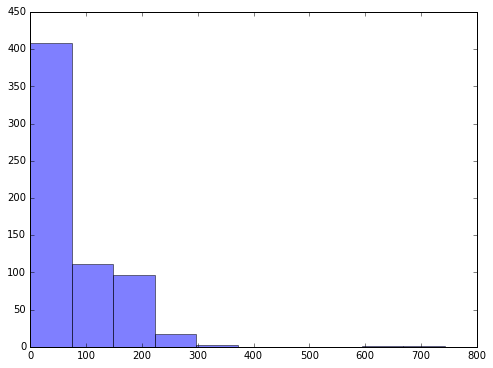

34.786
69.55871940532082


In [105]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.hist(hours_arr,color='b',alpha=0.5)
plt.show()

print(np.median(hours_arr))
print(np.mean(hours_arr))

In [115]:
# histogram of baselines

f = open("./speculoos_unique_obs.json")
data = json.load(f)

print(type(data))
print(len(data[0]))

gaia_ids = []
dates = []

for obs in data[0]:
    try:
        gaia_ids.append(int(obs['gaia_id']))
        dates.append(int(obs['date']))
    except ValueError:
        print(obs)

gaia_ids = np.array(gaia_ids)
dates = np.array(dates)

unique_gaia_ids = np.unique(gaia_ids)
print(len(unique_gaia_ids))

<class 'list'>
10319
{'telescope': 'Saint-Ex_Prince', 'date': '20191126', 'filter': ' ', 'gaia_id': 'TYC2291-1627-1', 'sp_id': 'TYC2291-1627-1 627-1', 'last_mod_time': '2020-10-30 20:56:46'}
{'telescope': 'Saint-Ex_Prince', 'date': '20200116', 'filter': ' ', 'gaia_id': 'k2', 'sp_id': 'k2 k2', 'last_mod_time': '2020-10-30 20:56:46'}
{'telescope': 'Saint-Ex_Prince', 'date': '20200121', 'filter': ' ', 'gaia_id': 'HWVirN', 'sp_id': 'HWVirN WVirN', 'last_mod_time': '2020-10-30 20:56:46'}
{'telescope': 'Saint-Ex_Prince', 'date': '20200124', 'filter': ' ', 'gaia_id': 'HWVirS', 'sp_id': 'HWVirS WVirS', 'last_mod_time': '2020-10-30 20:56:46'}
{'telescope': 'Saint-Ex_Prince', 'date': '20200127', 'filter': ' ', 'gaia_id': 'HWVirN', 'sp_id': 'HWVirN WVirN', 'last_mod_time': '2020-10-30 20:56:46'}
{'telescope': 'Saint-Ex_Prince', 'date': '20200128', 'filter': ' ', 'gaia_id': 'TOI1266', 'sp_id': 'TOI1266 I1266', 'last_mod_time': '2020-10-30 20:56:46'}
{'telescope': 'Saint-Ex_Prince', 'date': '202001

/Users/Emily/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


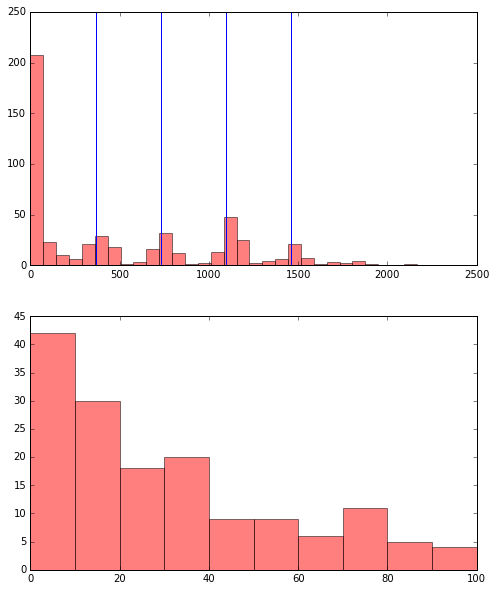

[19. 10. 11. 11. 54. 12. 70. 20. 68.  2.  2. 41.  4. 19. 99. 26. 76.  2.
 69.  2. 75.  3.  8. 11.  2. 35.  6.  1. 10. 10.  4.  8. 24.  5. 31. 28.
 39. 38. 65. 13. 47. 58. 12. 65. 78. 78. 43. 81. 99. 78. 19. 11. 49. 13.
 16.  1.  1.  8. 23.  1. 30. 75. 97. 28. 35.  9. 54. 39. 10. 17. 17. 70.
 42. 16. 16.  9. 67.  1. 12.  7. 19. 13. 31. 33.  6.  6. 25. 55. 32.  3.
 38.  7.  3. 32. 11. 17. 26. 56. 89. 23. 23. 83. 83. 51. 38. 12. 79. 27.
 12. 24. 55. 44.  5.  3. 61.  6. 37. 76. 22.  6. 38.  2.  1. 47. 47. 84.
 16. 39. 13. 22.  2. 38. 23.  1. 35. 24. 24.  4. 10. 50.  8. 47.  8. 20.
 99.  5.  2.  3. 31. 50. 32.  2. 78.  1.]


In [145]:
dateRanges = []
for gid in unique_gaia_ids:
    thisTargetMask = [gaia_ids == gid]
    thisTargetDates = dates[thisTargetMask]
    #print(thisTargetDates)
    
    jds = []
    for date in thisTargetDates:
        #print(date)
        date = dateutil.parser.parse(str(date))
        #print(date)
        date = astropy.time.Time(date)
        #print(date.jd)
        jds.append(date.jd)
    
    jds = np.array(jds)
    #print(jds)
    dateRange = np.max(jds) - np.min(jds)
    #print(dateRange)
    dateRanges.append(float(dateRange))

dateRanges = np.array(dateRanges)

fig, axes = plt.subplots(2,1,figsize=(8,10))
axes[0].hist(dateRanges,bins=30,color='r',alpha=0.5)
for i in range(1,5):
    axes[0].axvline(i*365.25)
axes[1].hist(dateRanges[(dateRanges > 0) & (dateRanges < 100)],range=(0,100),color='r',alpha=0.5)
plt.show()

print(dateRanges[(dateRanges > 0) & (dateRanges < 100)])